In [1]:
import pandas as pd
import numpy as np

# IMPORT DATA

In [2]:
electricity_data=pd.read_csv(r'C:\Users\Deepika\Downloads\ML\Electricity Consumption.csv')

# DATA AUDIT

In [3]:
electricity_data.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
electricity_data.tail()

,DATE,Electricty_Consumption_in_TW
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [5]:
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
electricity_data.duplicated().sum()

0

In [7]:
electricity_data.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [8]:
electricity_data.shape

(561, 2)

# DATA CLEANING

In [9]:
electricity_data['DATE'] = pd.to_datetime(electricity_data.DATE)

In [10]:
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [11]:
#set Date as the index
electricity_data.set_index(electricity_data.DATE,inplace = True)

In [15]:
electricity_data['year'] = electricity_data.DATE.dt.year
electricity_data['month'] =electricity_data.DATE.dt.month

In [16]:
electricity_data.head(2)

,DATE,Electricty_Consumption_in_TW,year,month
DATE,,,,
1973-01-01,1973-01-01,35.9728,1973,1
1973-02-01,1973-02-01,36.1334,1973,2


# EXPLORATORY DATA ANALYSIS

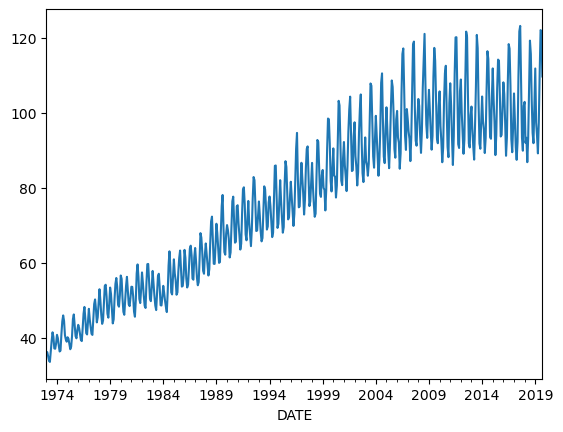

In [14]:
#electricity consumption graph
import matplotlib.pyplot as plt
%matplotlib inline
electricity_data.Electricty_Consumption_in_TW.plot()
plt.show()

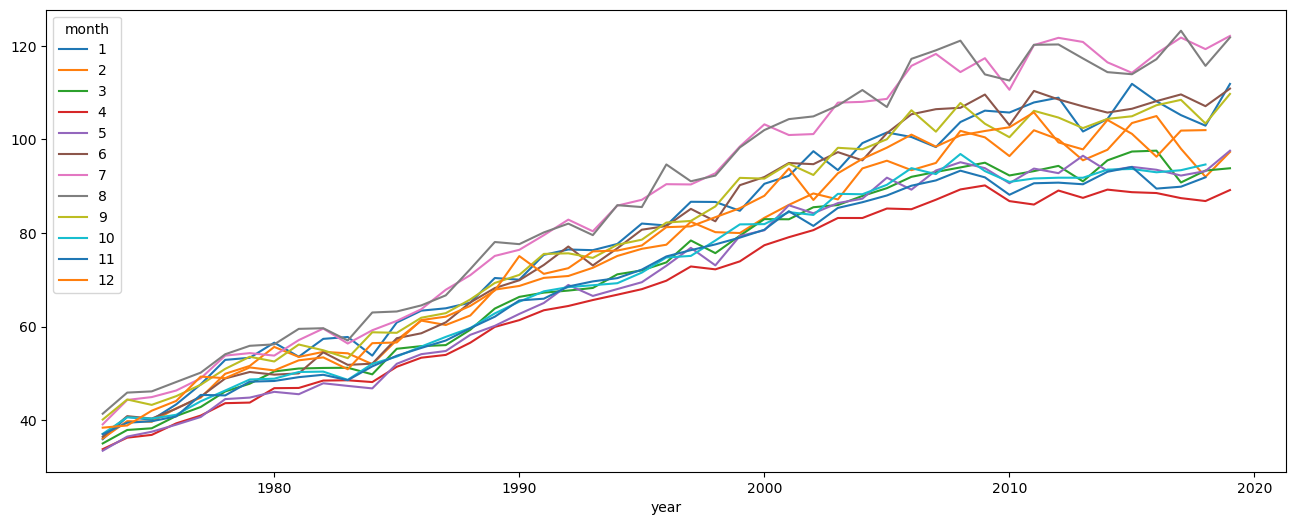

In [18]:
pivot_YM = pd.pivot_table(data = electricity_data, index = 'year', columns = 'month', values = 'Electricty_Consumption_in_TW')
pivot_YM.plot(legend=True , figsize=(16,6))
plt.show()

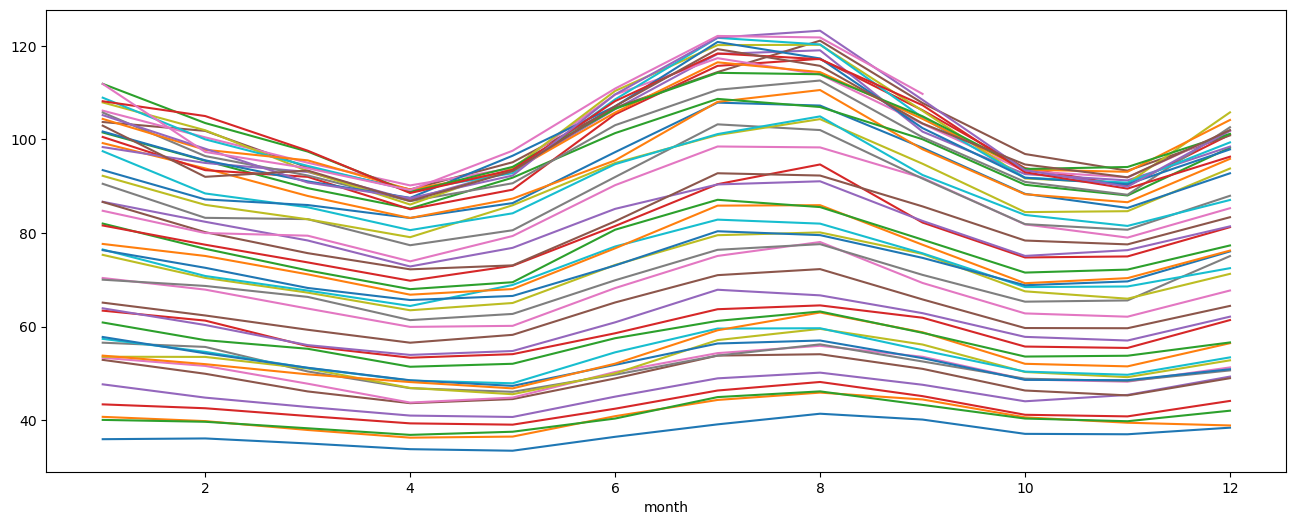

In [20]:
pivot_MY = pd.pivot_table(data = electricity_data, index = 'month', columns = 'year', values = 'Electricty_Consumption_in_TW')
pivot_MY.plot(legend=False, figsize=(16,6))
plt.show()

# DECOMPOSITION

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
seasonal_decompose(electricity_data.Electricty_Consumption_in_TW)

In [23]:
sd = seasonal_decompose(electricity_data.Electricty_Consumption_in_TW, model =
                  'additive')

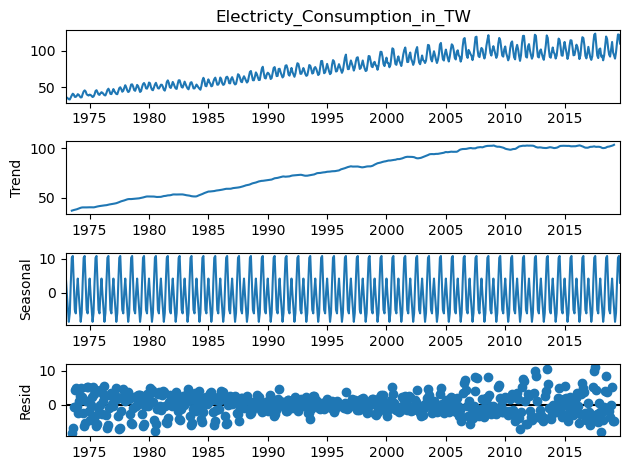

In [24]:
sd.plot()
plt.show()

In [26]:
decomposition_output  = pd.concat([sd.observed,sd.trend,sd.seasonal,sd.resid], axis = 1).head(24)
decomposition_output

,Electricty_Consumption_in_TW,trend,seasonal,resid
DATE,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


In [27]:
#checking auto corelation and pacf
from statsmodels.tsa.stattools import acf,pacf_ols

In [29]:
acf(electricity_data.Electricty_Consumption_in_TW, nlags = 24)

array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636])

In [30]:
pacf_ols(electricity_data.Electricty_Consumption_in_TW, nlags = 24)

array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ])

In [31]:
import statsmodels.tsa.api as smt

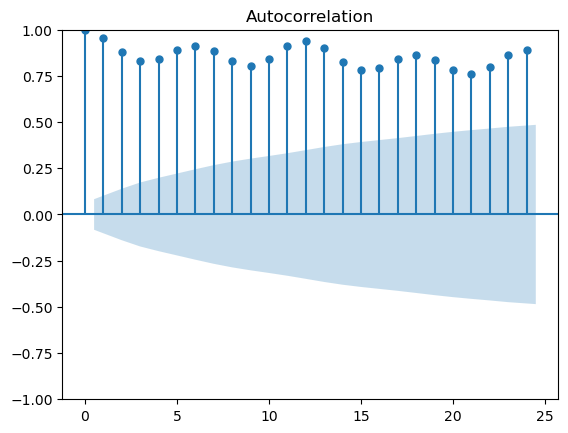

In [33]:
smt.graphics.plot_acf(electricity_data.Electricty_Consumption_in_TW , lags = 24)
plt.show()

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


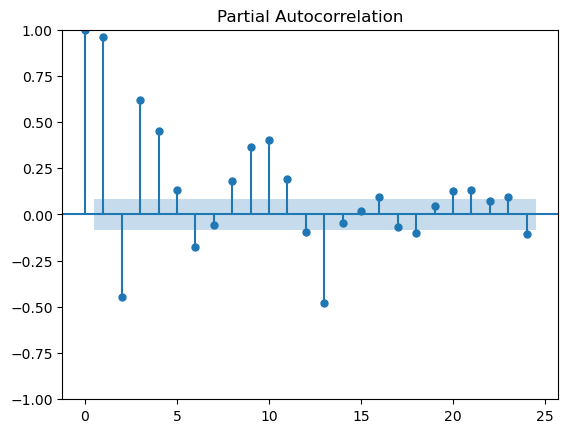

In [34]:
smt.graphics.plot_pacf(electricity_data.Electricty_Consumption_in_TW , lags = 24)
plt.show()

In [35]:
# see wheather series is stationary or not by ADF test
# p value low - series is stationary and vice versa
from statsmodels.tsa.stattools import adfuller

In [36]:
adfuller(electricity_data.Electricty_Consumption_in_TW )
#as p value is very high we can say that series is not stationary

(-1.7405933729832443,
 0.41032816044686793,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

p-value: 0.41032  , since p-value is high, the series(ts) is not stationary

In [37]:
adfuller(np.log(electricity_data.Electricty_Consumption_in_TW).diff(1).dropna())

(-6.884809722917913,
 1.4034181751306841e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

p-value=1.4034181751306841e-09, since p-value<0.05, the series (ts_diff) is stationary series

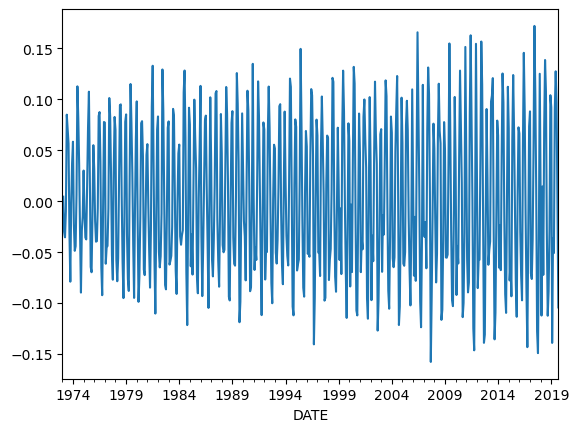

In [38]:
np.log(electricity_data.Electricty_Consumption_in_TW).diff(1).plot()
plt.show()

In [39]:
# how to convert non stationary series into stationary series -- apply log trans or difference transaformation
adfuller(np.log(electricity_data.Electricty_Consumption_in_TW ))
#we can see the p value is significantly reduced -- but not that much so try diff

(-3.0018666788915827,
 0.03472044330065443,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

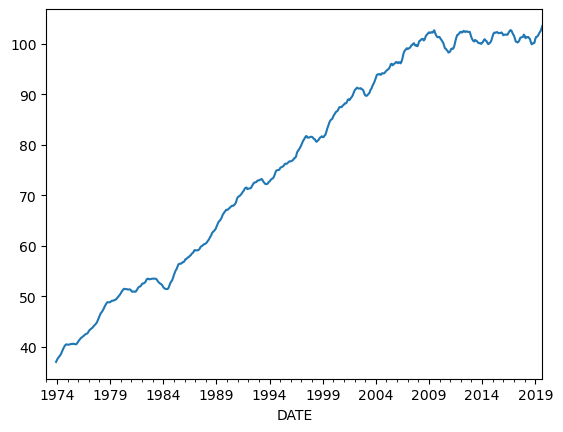

In [40]:
electricity_data.Electricty_Consumption_in_TW.rolling(window=12).mean().plot()
plt.show()

# ETS MODEL

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [42]:
ets = ExponentialSmoothing(electricity_data.Electricty_Consumption_in_TW,trend = 'mul', seasonal = 'mul',seasonal_periods = 12)

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
ets = ets.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)
#these 3 are alpha beta gamma simultaneously

C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1341183270.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets = ets.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [44]:
ets.forecast(steps=12)

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
Freq: MS, dtype: float64

In [45]:
print(ets.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                     ExponentialSmoothing   SSE                           3675.183
Optimized:                                 True   AIC                           1086.477
Trend:                           Multiplicative   BIC                           1155.752
Seasonal:                        Multiplicative   AICC                          1087.739
Seasonal Periods:                            12   Date:                 Thu, 02 Mar 2023
Box-Cox:                                  False   Time:                         12:08:54
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.100

# SPLITTING THE DATA

In [46]:
electricity_data.Electricty_Consumption_in_TW['1973-01-01':'2018-12-01']

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [47]:
electricity_data.Electricty_Consumption_in_TW['2019-01-01':]

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [48]:
train = electricity_data.Electricty_Consumption_in_TW['1973-01-01':'2018-12-01']
test = electricity_data.Electricty_Consumption_in_TW['2019-01-01':]

In [49]:
ets_1 = ExponentialSmoothing(train,trend = 'add', seasonal = 'add',seasonal_periods = 12)
ets_1 = ets_1.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1596087983.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_1 = ets_1.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)


In [50]:
fct = ets_1.forecast(steps=6)
fct 

2019-01-01    103.726844
2019-02-01     96.785745
2019-03-01     92.966152
2019-04-01     87.348848
2019-05-01     93.286194
2019-06-01    107.753086
Freq: MS, dtype: float64

In [51]:
#calculating error and % of error
np.mean(abs(test - fct)/test)
# 3% error - very low error

0.030032598868766903

In [52]:
#check in train data,if the value is valid or not
ets_1.fittedvalues['2018-01-01':]

DATE
2018-01-01    109.742855
2018-02-01    103.123267
2018-03-01     95.964840
2018-04-01     89.390323
2018-05-01     93.847428
2018-06-01    107.296341
2018-07-01    116.985199
2018-08-01    116.124662
2018-09-01    103.114160
2018-10-01     89.896410
2018-11-01     88.080718
2018-12-01     97.992857
dtype: float64

In [53]:
train['2018-01-01':] 

DATE
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
Name: Electricty_Consumption_in_TW, dtype: float64

In [54]:
np.mean(abs(train['2018-01-01':] - ets_1.fittedvalues['2018-01-01':])/train['2018-01-01':])
# approx 3% error

0.03411381972371869

In [55]:
#checking best model with different values of alpha,beta and gamma
for alpha in [0.1,0.2,0.3,0.4,0.5]:
    for beta in [0.1,0.2,0.3,0.4,0.5]:
        for gamma in [0.1,0.2,0.3,0.4,0.5]:
            ets_2 = ExponentialSmoothing(train,trend = 'add', seasonal = 'add',seasonal_periods = 12)
            ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
            fct = ets_2.forecast(steps=6)
            print('alpha:', alpha,'beta:', beta,'gamma:', gamma)
            print('MAPE',np.mean(np.abs(test - fct)/test))

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.1 beta: 0.1 gamma: 0.1
MAPE 0.0267032109847106
alpha: 0.1 beta: 0.1 gamma: 0.2
MAPE 0.0277038043280029
alpha: 0.1 beta: 0.1 gamma: 0.3
MAPE 0.028434888845029708
alpha: 0.1 beta: 0.1 gamma: 0.4
MAPE 0.031280544998509005


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.1 beta: 0.1 gamma: 0.5
MAPE 0.034984840617407524
alpha: 0.1 beta: 0.2 gamma: 0.1
MAPE 0.02518707331822238
alpha: 0.1 beta: 0.2 gamma: 0.2
MAPE 0.025985808790570445


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: Futur

alpha: 0.1 beta: 0.2 gamma: 0.3
MAPE 0.02745020012264847
alpha: 0.1 beta: 0.2 gamma: 0.4
MAPE 0.031679524876360644
alpha: 0.1 beta: 0.2 gamma: 0.5
MAPE 0.037086960853191374
alpha: 0.1 beta: 0.3 gamma: 0.1
MAPE 0.024518589715000358


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.1 beta: 0.3 gamma: 0.2
MAPE 0.02594763796820179
alpha: 0.1 beta: 0.3 gamma: 0.3
MAPE 0.02894364533895299
alpha: 0.1 beta: 0.3 gamma: 0.4
MAPE 0.03464805994087442
alpha: 0.1 beta: 0.3 gamma: 0.5
MAPE 0.04185116308947088


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: Futur

alpha: 0.1 beta: 0.4 gamma: 0.1
MAPE 0.025272282070075643
alpha: 0.1 beta: 0.4 gamma: 0.2
MAPE 0.02774666920365455
alpha: 0.1 beta: 0.4 gamma: 0.3
MAPE 0.032485192802909756


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.1 beta: 0.4 gamma: 0.4
MAPE 0.039410401692804374
alpha: 0.1 beta: 0.4 gamma: 0.5
MAPE 0.04862446587735627
alpha: 0.1 beta: 0.5 gamma: 0.1
MAPE 0.025137392197750578
alpha: 0.1 beta: 0.5 gamma: 0.2
MAPE 0.02948320405423184


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.1 beta: 0.5 gamma: 0.3
MAPE 0.03546691047705825
alpha: 0.1 beta: 0.5 gamma: 0.4
MAPE 0.043985006245970217
alpha: 0.1 beta: 0.5 gamma: 0.5
MAPE 0.05598205899799701
alpha: 0.2 beta: 0.1 gamma: 0.1
MAPE 0.023716011025079368


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: Futur

alpha: 0.2 beta: 0.1 gamma: 0.2
MAPE 0.02293008533767474
alpha: 0.2 beta: 0.1 gamma: 0.3
MAPE 0.021997381873692434
alpha: 0.2 beta: 0.1 gamma: 0.4
MAPE 0.020744828661352868
alpha: 0.2 beta: 0.1 gamma: 0.5
MAPE 0.02250089789796131


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.2 beta: 0.2 gamma: 0.1
MAPE 0.022837241593844874
alpha: 0.2 beta: 0.2 gamma: 0.2
MAPE 0.02039876938589669
alpha: 0.2 beta: 0.2 gamma: 0.3
MAPE 0.0193584343583384
alpha: 0.2 beta: 0.2 gamma: 0.4
MAPE 0.01808152234582004


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.2 beta: 0.2 gamma: 0.5
MAPE 0.020564017217258798
alpha: 0.2 beta: 0.3 gamma: 0.1
MAPE 0.021790020526931384
alpha: 0.2 beta: 0.3 gamma: 0.2
MAPE 0.019525887807925805
alpha: 0.2 beta: 0.3 gamma: 0.3
MAPE 0.021587847775781297


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.2 beta: 0.3 gamma: 0.4
MAPE 0.02513248724848217
alpha: 0.2 beta: 0.3 gamma: 0.5
MAPE 0.032240652869310875
alpha: 0.2 beta: 0.4 gamma: 0.1
MAPE 0.02588109553209089
alpha: 0.2 beta: 0.4 gamma: 0.2
MAPE 0.029019358899049736


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.2 beta: 0.4 gamma: 0.3
MAPE 0.039994665554221834
alpha: 0.2 beta: 0.4 gamma: 0.4
MAPE 0.05381293747015912
alpha: 0.2 beta: 0.4 gamma: 0.5
MAPE 0.07623975764307743
alpha: 0.2 beta: 0.5 gamma: 0.1
MAPE 0.040433820029564534


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.2 beta: 0.5 gamma: 0.2
MAPE 0.050518911191920736
alpha: 0.2 beta: 0.5 gamma: 0.3
MAPE 0.06906866264605435
alpha: 0.2 beta: 0.5 gamma: 0.4
MAPE 0.0947389972176342
alpha: 0.2 beta: 0.5 gamma: 0.5
MAPE 0.15439537932924513


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.1 gamma: 0.1
MAPE 0.02263393591474193
alpha: 0.3 beta: 0.1 gamma: 0.2
MAPE 0.021108816663790424
alpha: 0.3 beta: 0.1 gamma: 0.3
MAPE 0.021671167568454452
alpha: 0.3 beta: 0.1 gamma: 0.4
MAPE 0.021933392186626478


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.1 gamma: 0.5
MAPE 0.023519504635480627
alpha: 0.3 beta: 0.2 gamma: 0.1
MAPE 0.023331110518722997
alpha: 0.3 beta: 0.2 gamma: 0.2
MAPE 0.021919673055317473
alpha: 0.3 beta: 0.2 gamma: 0.3
MAPE 0.02730512078276585


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.2 gamma: 0.4
MAPE 0.035250163624159614
alpha: 0.3 beta: 0.2 gamma: 0.5
MAPE 0.04226430952386235
alpha: 0.3 beta: 0.3 gamma: 0.1
MAPE 0.03328207392860613
alpha: 0.3 beta: 0.3 gamma: 0.2
MAPE 0.03148442831303449


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.3 gamma: 0.3
MAPE 0.045958879236871746
alpha: 0.3 beta: 0.3 gamma: 0.4
MAPE 0.05662159547620635
alpha: 0.3 beta: 0.3 gamma: 0.5
MAPE 0.05968452497208557
alpha: 0.3 beta: 0.4 gamma: 0.1
MAPE 0.040574899422538765


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.4 gamma: 0.2
MAPE 0.04095281998713212
alpha: 0.3 beta: 0.4 gamma: 0.3
MAPE 0.06296619466335107
alpha: 0.3 beta: 0.4 gamma: 0.4
MAPE 0.07589192602833977
alpha: 0.3 beta: 0.4 gamma: 0.5
MAPE 0.052152062641573425


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.5 gamma: 0.1
MAPE 0.037758515280314355
alpha: 0.3 beta: 0.5 gamma: 0.2
MAPE 0.03737156602769648
alpha: 0.3 beta: 0.5 gamma: 0.3
MAPE 0.07432508798465996
alpha: 0.3 beta: 0.5 gamma: 0.4
MAPE 0.07933515026459376


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.3 beta: 0.5 gamma: 0.5
MAPE 0.07182737364512401
alpha: 0.4 beta: 0.1 gamma: 0.1
MAPE 0.023499534379733598
alpha: 0.4 beta: 0.1 gamma: 0.2
MAPE 0.0210694235475877
alpha: 0.4 beta: 0.1 gamma: 0.3
MAPE 0.023382251559796854


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.4 beta: 0.1 gamma: 0.4
MAPE 0.02690977956336396
alpha: 0.4 beta: 0.1 gamma: 0.5
MAPE 0.031315552186756974
alpha: 0.4 beta: 0.2 gamma: 0.1
MAPE 0.03442739076759974
alpha: 0.4 beta: 0.2 gamma: 0.2
MAPE 0.022775471101080306


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.4 beta: 0.2 gamma: 0.3
MAPE 0.03149695474951885
alpha: 0.4 beta: 0.2 gamma: 0.4
MAPE 0.04412602015641113
alpha: 0.4 beta: 0.2 gamma: 0.5
MAPE 0.05027166988613226
alpha: 0.4 beta: 0.3 gamma: 0.1
MAPE 0.04506881016194084


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.4 beta: 0.3 gamma: 0.2
MAPE 0.024008860260782694
alpha: 0.4 beta: 0.3 gamma: 0.3
MAPE 0.040932520633327266
alpha: 0.4 beta: 0.3 gamma: 0.4
MAPE 0.06182839435130694
alpha: 0.4 beta: 0.3 gamma: 0.5
MAPE 0.060977439260512


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.4 beta: 0.4 gamma: 0.1
MAPE 0.052858895189421495
alpha: 0.4 beta: 0.4 gamma: 0.2
MAPE 0.023361821568999366
alpha: 0.4 beta: 0.4 gamma: 0.3
MAPE 0.037645205989857385
alpha: 0.4 beta: 0.4 gamma: 0.4
MAPE 0.06344463678972932


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.4 beta: 0.4 gamma: 0.5
MAPE 0.06029844686210201
alpha: 0.4 beta: 0.5 gamma: 0.1
MAPE 0.0578367032926932
alpha: 0.4 beta: 0.5 gamma: 0.2
MAPE 0.02321238424041291
alpha: 0.4 beta: 0.5 gamma: 0.3
MAPE 0.03534693378052437


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.4 beta: 0.5 gamma: 0.4
MAPE 0.05240954322256846
alpha: 0.4 beta: 0.5 gamma: 0.5
MAPE 0.05523588135031509
alpha: 0.5 beta: 0.1 gamma: 0.1
MAPE 0.030381574819192934
alpha: 0.5 beta: 0.1 gamma: 0.2
MAPE 0.020224521359498652


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.5 beta: 0.1 gamma: 0.3
MAPE 0.024582837357798367
alpha: 0.5 beta: 0.1 gamma: 0.4
MAPE 0.028509486142239856
alpha: 0.5 beta: 0.1 gamma: 0.5
MAPE 0.034593051103858796
alpha: 0.5 beta: 0.2 gamma: 0.1
MAPE 0.04438898432585337


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.5 beta: 0.2 gamma: 0.2
MAPE 0.020170499069252605
alpha: 0.5 beta: 0.2 gamma: 0.3
MAPE 0.026079395075663567
alpha: 0.5 beta: 0.2 gamma: 0.4
MAPE 0.04151702223180343
alpha: 0.5 beta: 0.2 gamma: 0.5
MAPE 0.052388318321129335


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.5 beta: 0.3 gamma: 0.1
MAPE 0.05716601003634165
alpha: 0.5 beta: 0.3 gamma: 0.2
MAPE 0.01995066887804075
alpha: 0.5 beta: 0.3 gamma: 0.3
MAPE 0.027526594077707814
alpha: 0.5 beta: 0.3 gamma: 0.4
MAPE 0.04367953421212555


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.5 beta: 0.3 gamma: 0.5
MAPE 0.05277948410811226
alpha: 0.5 beta: 0.4 gamma: 0.1
MAPE 0.06138445878908158
alpha: 0.5 beta: 0.4 gamma: 0.2
MAPE 0.02228301764700785
alpha: 0.5 beta: 0.4 gamma: 0.3
MAPE 0.02908522900261661


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.5 beta: 0.4 gamma: 0.4
MAPE 0.039585241162585966
alpha: 0.5 beta: 0.4 gamma: 0.5
MAPE 0.043663620672893366
alpha: 0.5 beta: 0.5 gamma: 0.1
MAPE 0.05225533212799452
alpha: 0.5 beta: 0.5 gamma: 0.2
MAPE 0.03265594660007335


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mode

alpha: 0.5 beta: 0.5 gamma: 0.3
MAPE 0.03621159893905227
alpha: 0.5 beta: 0.5 gamma: 0.4
MAPE 0.040252817963889784
alpha: 0.5 beta: 0.5 gamma: 0.5
MAPE 0.036217223204297266


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\3085859692.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level =alpha,smoothing_slope = beta,smoothing_seasonal = gamma)


In [56]:
#checking best model with different values of alpha,beta and gamma
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [57]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [59]:
auto_hwm(electricity_data.Electricty_Consumption_in_TW, val_split_date ='2018-12-01', alpha=alpha, beta=beta, gamma=gamma, 
              trend='add', seasonal='add', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 729 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.5}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.6}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimizat

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimizat

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.6}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.8}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.9}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.4}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.7}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check ml

Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.9}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.3}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimizat

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.2}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimizat

Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.1}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.4}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.2}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.5}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.8}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.8}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.1}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimizat

Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.4}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.2}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.3}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.3}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.6}


C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword 

Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimizat

Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.5}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.7}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.2}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency infor

Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.4}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq

Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.6}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.8}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\1244716401.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(

Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.9}


C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2, 'mae': array(0.01624865)}

In [63]:
ets_2 = ExponentialSmoothing(train,trend = 'add', seasonal = 'add',seasonal_periods = 12)
ets_2 = ets_2.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)
fct = ets_2.forecast(steps=6)

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\AppData\Local\Temp\ipykernel_18848\2782193559.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_2 = ets_2.fit(smoothing_level = 0.1,smoothing_slope = 0.6,smoothing_seasonal = 0.2)


In [64]:
ets_2.fittedvalues['2018-01-01':]

DATE
2018-01-01    109.742855
2018-02-01    103.123267
2018-03-01     95.964840
2018-04-01     89.390323
2018-05-01     93.847428
2018-06-01    107.296341
2018-07-01    116.985199
2018-08-01    116.124662
2018-09-01    103.114160
2018-10-01     89.896410
2018-11-01     88.080718
2018-12-01     97.992857
dtype: float64

In [65]:
fct

2019-01-01    103.726844
2019-02-01     96.785745
2019-03-01     92.966152
2019-04-01     87.348848
2019-05-01     93.286194
2019-06-01    107.753086
Freq: MS, dtype: float64

In [66]:
print('test error',np.mean(abs(test - fct)/test))
#test error is very low

test error 0.030032598868766903


In [67]:
print('train error',np.mean(abs(train['2018-01-01':] - ets_1.fittedvalues['2018-01-01':])/train['2018-01-01':]))
#train error is very low

train error 0.03411381972371869


# FITTING THE MODEL

 ARIMA/SARIMA/ARIMAX

 FINDING THE SERIES IS ARIMAX OR SARIMAX
 
 Finding the values of(p,d,q) and (P,D,Q,T)
 
 X Variables

In [68]:
yt = np.log(electricity_data.Electricty_Consumption_in_TW).diff(1).dropna()
yt

DATE
1973-02-01    0.004455
1973-03-01   -0.030085
1973-04-01   -0.035441
1973-05-01   -0.009826
1973-06-01    0.084962
                ...   
2019-05-01    0.089995
2019-06-01    0.127516
2019-07-01    0.096602
2019-08-01   -0.002664
2019-09-01   -0.104265
Name: Electricty_Consumption_in_TW, Length: 560, dtype: float64

In [69]:
# input for ARIMA model should be stationary series
ln_sales = np.log(electricity_data.Electricty_Consumption_in_TW)
# d = 1 explicitly

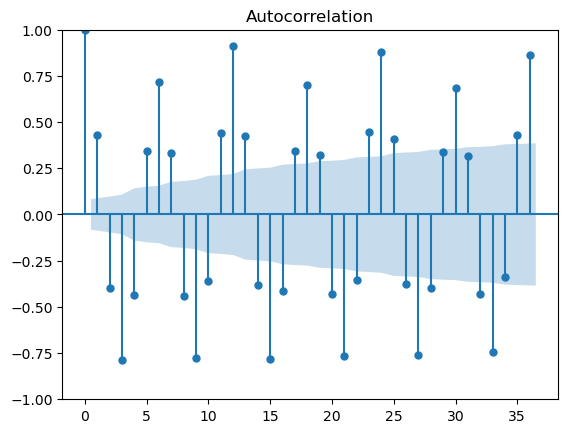

In [71]:
smt.graphics.plot_acf(yt,lags = 36)
plt.show()
# we can see that in every 12 months patterns are repeating - so it has seasonality - it is SARIMA
# q = after which lag,the value of autocorelation becomes zero or crossing zero-- here we can see after lag 1 is becoming zero

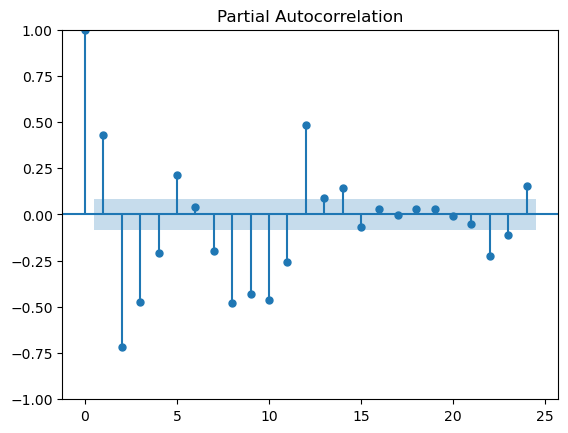

In [72]:
smt.graphics.plot_pacf(yt,lags = 24,method = 'ols')
plt.show()
# p = after which lag,the value of partial autocorelation becomes zero or crossing zero-- here we can see after lag 1 is becoming zero

In [73]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1,1,1), seasonal_order = (1,0,1,12),
                                 enforce_stationarity=False,
                                 enforce_invertibility = False).fit()

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1064.630
Date:                            Thu, 02 Mar 2023   AIC                           2139.259
Time:                                    12:30:02   BIC                           2160.689
Sample:                                01-01-1973   HQIC                          2147.643
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5905      0.045     12.991      0.000       0.501       0.680
ma.L1         -0.9107      0.026   

In [75]:
#log form
fct = model.forecast(steps=6)

In [76]:
fct

2019-01-01    107.173313
2019-02-01     98.873907
2019-03-01     93.836569
2019-04-01     86.994546
2019-05-01     92.992028
2019-06-01    108.557424
Freq: MS, Name: predicted_mean, dtype: float64

In [77]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [78]:
acp = np.exp(test)
acp

DATE
2019-01-01    3.773170e+48
2019-02-01    1.854335e+42
2019-03-01    5.681392e+40
2019-04-01    5.414424e+38
2019-05-01    2.404702e+42
2019-06-01    1.396425e+48
2019-07-01    1.066508e+53
2019-08-01    7.706585e+52
2019-09-01    4.470502e+47
Name: Electricty_Consumption_in_TW, dtype: float64

In [79]:
# error of test accuracy is very low
np.mean(abs(test - fct)/test)

0.025031677141884975

In [82]:
model_1 = sm.tsa.statespace.SARIMAX(ln_sales, order = (1,1,1), seasonal_order = (1,0,1,12),
                                 enforce_stationarity=False,
                                 enforce_invertibility = False).fit()

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
fct_2  = np.exp(model_1.forecast(steps=36))
fct_2

2019-10-01     96.391177
2019-11-01     93.769249
2019-12-01    103.838916
2020-01-01    109.987342
2020-02-01    100.752377
2020-03-01     96.224855
2020-04-01     90.030731
2020-05-01     96.327796
2020-06-01    111.116177
2020-07-01    122.770962
2020-08-01    121.948763
2020-09-01    108.896863
2020-10-01     96.111917
2020-11-01     93.799825
2020-12-01    104.173040
2021-01-01    110.532421
2021-02-01    101.264008
2021-03-01     96.726451
2021-04-01     90.480953
2021-05-01     96.877178
2021-06-01    111.884394
2021-07-01    123.722462
2021-08-01    122.892740
2021-09-01    109.647768
2021-10-01     96.683899
2021-11-01     94.341408
2021-12-01    104.859129
2022-01-01    111.311174
2022-02-01    101.909482
2022-03-01     97.309048
2022-04-01     90.979604
2022-05-01     97.461974
2022-06-01    112.683729
2022-07-01    124.702173
2022-08-01    123.859528
2022-09-01    110.414132
Freq: MS, Name: predicted_mean, dtype: float64

In [84]:
p = [0,1,2];q = [0,1,2];d = [2];P = [0,1,2];Q = [0,1,2];D = [0,1]

In [85]:
import itertools
list(itertools.product(p, d, q))

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [86]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [87]:
#calculating best results considering different values
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [88]:
best_results = auto_arima(ln_sales,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-1238.5110123342886
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-1556.8995683958988
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-1641.3644927596924
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-1934.709745639732
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-2121.063846146127
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:-2075.262587628293
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-1967.9124463206467
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-2174.47100269176
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-2121.6305256792575
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-1982.0537768703425
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-2116.111189782371
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:-2075.0049839739545
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-1989.6730893685149
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-2123.259451548972
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-2122.90941653137
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-2006.787254061043
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-2082.1612004368553
SARIMAX

In [89]:
#rerun the model with best values
model = sm.tsa.statespace.SARIMAX(ln_sales,
                                      order=(1, 2, 2),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()

In [90]:
f_cast = np.exp(model.forecast(steps = 36))
f_cast

2019-10-01     96.311393
2019-11-01     93.647750
2019-12-01    103.538479
2020-01-01    109.466426
2020-02-01    100.479798
2020-03-01     95.881630
2020-04-01     89.705090
2020-05-01     95.795867
2020-06-01    110.293265
2020-07-01    121.678277
2020-08-01    120.887695
2020-09-01    107.964212
2020-10-01     95.347994
2020-11-01     93.057779
2020-12-01    103.175597
2021-01-01    109.253578
2021-02-01    100.299915
2021-03-01     95.716226
2021-04-01     89.528959
2021-05-01     95.650763
2021-06-01    110.218778
2021-07-01    121.662819
2021-08-01    120.860102
2021-09-01    107.858306
2021-10-01     95.175705
2021-11-01     92.868232
2021-12-01    103.020414
2022-01-01    109.117207
2022-02-01    100.114402
2022-03-01     95.503847
2022-04-01     89.286483
2022-05-01     95.421109
2022-06-01    110.038021
2022-07-01    121.524554
2022-08-01    120.707150
2022-09-01    107.638529
Freq: MS, Name: predicted_mean, dtype: float64

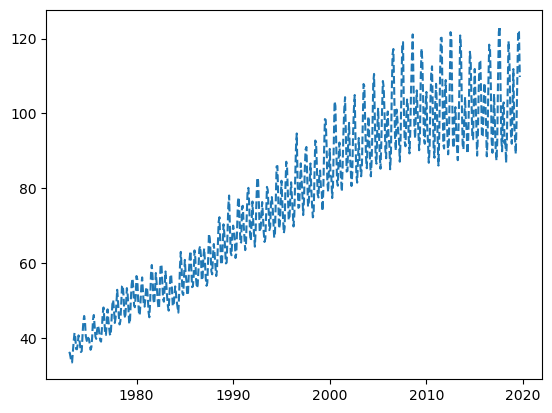

In [92]:
import matplotlib.pyplot as plt
plt.plot(electricity_data.Electricty_Consumption_in_TW,'--',label = 'obs')
plt.show()

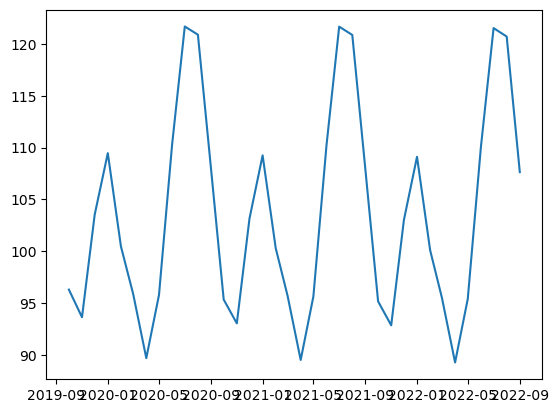

In [93]:
plt.plot(f_cast,'-',label=f_cast)
plt.show()

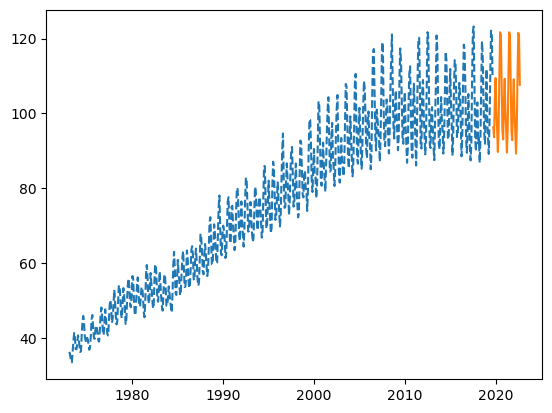

In [95]:
#running both together
plt.plot(electricity_data.Electricty_Consumption_in_TW,'--',label = 'obs')
plt.plot(f_cast,'-',label=f_cast)
plt.show()
#orange part showing the future values

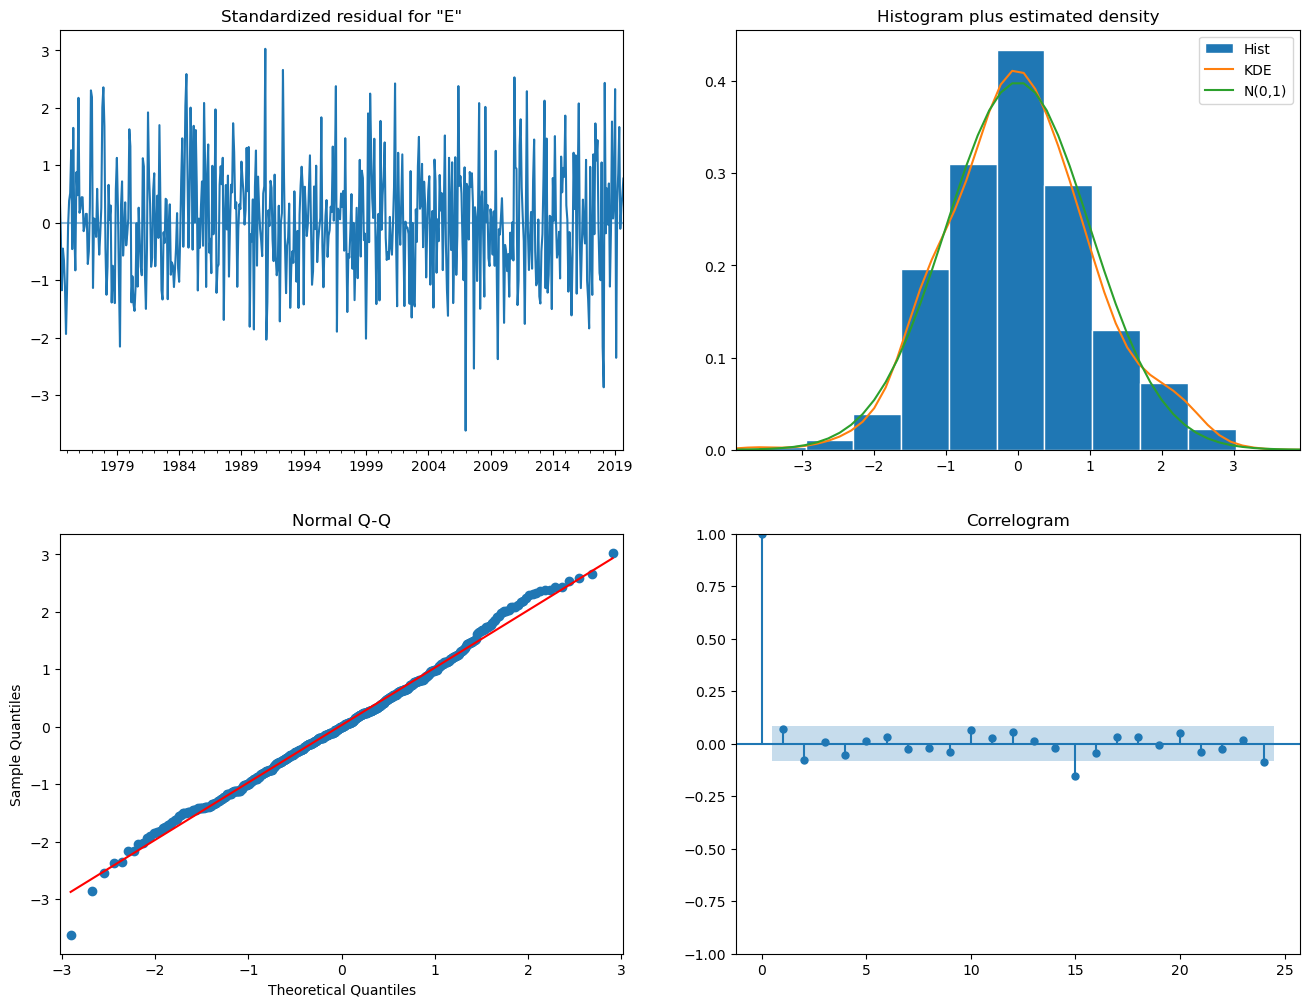

In [96]:
model.plot_diagnostics(lags = 24,figsize=(16,12))
plt.show()

We chose SARIMA model because of Seasonality present and as above graphs,like Histogram follows normal distribution which means-

Future predicted values are correct.